In [1]:
#This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition.

#Data Details:
#Gender: Gender
#Age: Age
#Height : in metres
#Weight : in kgs
#family_history : Has a family member suffered or suffers from overweight?
#FAVC : Do you eat high caloric food frequently?
#FCVC : Do you usually eat vegetables in your meals?
#NCP : How many main meals do you have daily?
#CAEC : Do you eat any food between meals?
#SMOKE : Do you smoke?
#CH2O : How much water do you drink daily?
#SCC : Do you monitor the calories you eat daily?
#FAF: How often do you have physical activity?
#TUE : How much time do you use technological devices such as cell phone, videogames, television, computer and others?
#CALC : How often do you drink alcohol?
#MTRANS : Which transportation do you usually use?
#Obesity_level (Target Column) : Obesity level

#Performed Classification techniques.

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [3]:
Obesity=pd.read_csv(r"C:\Users\shamzkha\Documents\Obesity prediction.csv")

In [4]:
Obesity.shape

(2111, 17)

In [5]:
Obesity.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
Obesity.isnull().sum()

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

In [7]:
Obesity.dtypes

Gender             object
Age               float64
Height            float64
Weight            float64
family_history     object
FAVC               object
FCVC              float64
NCP               float64
CAEC               object
SMOKE              object
CH2O              float64
SCC                object
FAF               float64
TUE               float64
CALC               object
MTRANS             object
Obesity            object
dtype: object

# Converting Categorical column to Numerical

In [9]:
Obesity.Gender=le.fit_transform(Obesity.Gender)

In [10]:
Obesity.family_history=le.fit_transform(Obesity.family_history)

In [11]:
Obesity.FAVC =le.fit_transform(Obesity.FAVC)

In [12]:
Obesity.CAEC=le.fit_transform(Obesity.CAEC)

In [13]:
Obesity.SMOKE=le.fit_transform(Obesity.SMOKE)

In [14]:
Obesity.SCC=le.fit_transform(Obesity.SCC)

In [15]:
Obesity.CALC=le.fit_transform(Obesity.CALC)

In [16]:
Obesity.MTRANS=le.fit_transform(Obesity.MTRANS)

In [17]:
Obesity.Obesity=le.fit_transform(Obesity.Obesity)

In [18]:
Obesity.dtypes

Gender              int32
Age               float64
Height            float64
Weight            float64
family_history      int32
FAVC                int32
FCVC              float64
NCP               float64
CAEC                int32
SMOKE               int32
CH2O              float64
SCC                 int32
FAF               float64
TUE               float64
CALC                int32
MTRANS              int32
Obesity             int32
dtype: object

# EDA

In [20]:
Obesity.Obesity.value_counts()

Obesity
2    351
4    324
3    297
5    290
6    290
1    287
0    272
Name: count, dtype: int64

In [21]:
#There is very less difference in values so no class imbalance treatment performed.

# Outlier Treatment

In [23]:
Obesity.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


<Axes: ylabel='Age'>

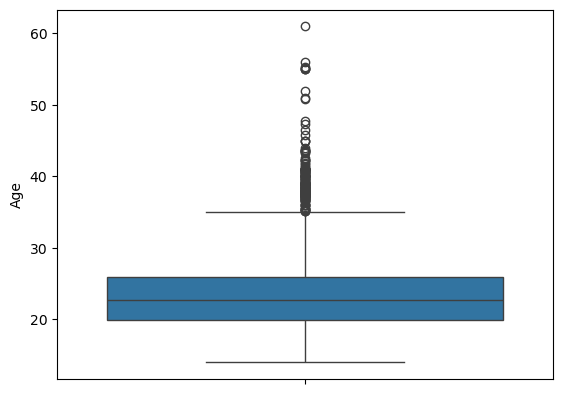

In [24]:
sns.boxplot(data=Obesity,y="Age")

In [25]:
Obesity.skew()

Gender           -0.023704
Age               1.529100
Height           -0.012855
Weight            0.255410
family_history   -1.646216
FAVC             -2.399125
FCVC             -0.432906
NCP              -1.107097
CAEC             -1.907526
SMOKE             6.712867
CH2O             -0.104912
SCC               4.366270
FAF               0.498490
TUE               0.618502
CALC              0.236481
MTRANS           -1.280169
Obesity           0.006754
dtype: float64

In [26]:
#we can see there is skewness so here we will use IQR method for outlier treatment

In [27]:
IQR=Obesity.Age.quantile(0.75)-Obesity.Age.quantile(0.25)
IQR

6.052807999999999

In [28]:
# the outlier is at upper boundary so we are changing the upper boundary

In [29]:
U1=Obesity["Age"].quantile(0.75)+(IQR*3)
print(U1)

44.158424


In [30]:
Obesity.Age.describe()

count    2111.000000
mean       24.312600
std         6.345968
min        14.000000
25%        19.947192
50%        22.777890
75%        26.000000
max        61.000000
Name: Age, dtype: float64

In [31]:
Obesity.loc[Obesity["Age"]>U1,"Age"]=U1 ##this formula will bring all the outlier points greater than U1 within the U1 range

<Axes: ylabel='Age'>

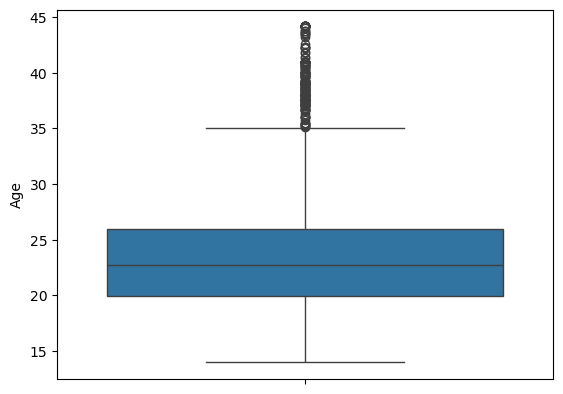

In [32]:
sns.boxplot(data=Obesity,y="Age")

<Axes: ylabel='Height'>

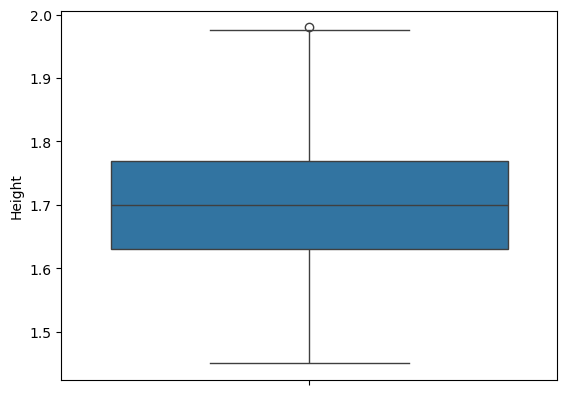

In [33]:
sns.boxplot(data=Obesity,y="Height")

In [34]:
#there is no skewness so we will treat outlier by std deviation method

In [35]:
up=Obesity["Height"].mean()+3*Obesity["Height"].std()
lb=Obesity["Height"].mean()-3*Obesity["Height"].std()
print(up,lb)

1.9815918129907804 1.4217628937832605


In [36]:
Obesity["Height"].describe()

count    2111.000000
mean        1.701677
std         0.093305
min         1.450000
25%         1.630000
50%         1.700499
75%         1.768464
max         1.980000
Name: Height, dtype: float64

In [37]:
Obesity.loc[Obesity["Height"]>up,"Height"]=up

<Axes: ylabel='Height'>

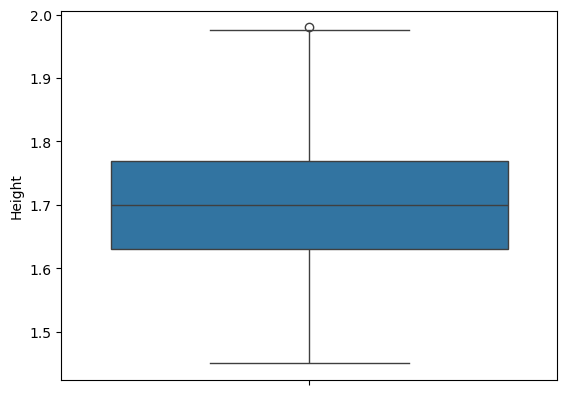

In [38]:
sns.boxplot(data=Obesity,y="Height")

<Axes: ylabel='Weight'>

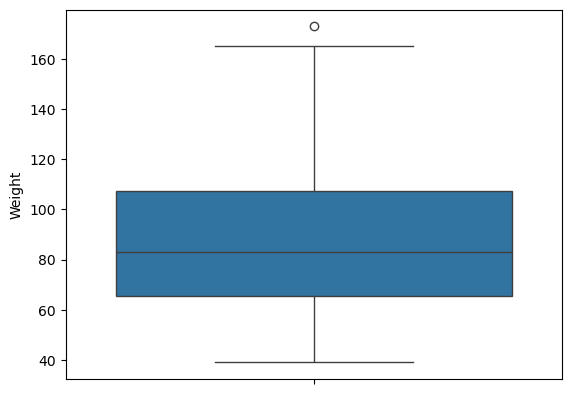

In [39]:
sns.boxplot(data=Obesity,y="Weight")

In [40]:
#Obesity.skew()

In [41]:
#there is no skewness so we will treat outlier by std deviation method

In [42]:
up=Obesity["Weight"].mean()+3*Obesity["Weight"].std()
lb=Obesity["Weight"].mean()-3*Obesity["Weight"].std()
print(up,lb)

165.15957336209442 8.012542890866285


In [43]:
Obesity["Weight"].describe()

count    2111.000000
mean       86.586058
std        26.191172
min        39.000000
25%        65.473343
50%        83.000000
75%       107.430682
max       173.000000
Name: Weight, dtype: float64

In [44]:
Obesity.loc[Obesity["Weight"]>up,"Weight"]=up

<Axes: ylabel='Weight'>

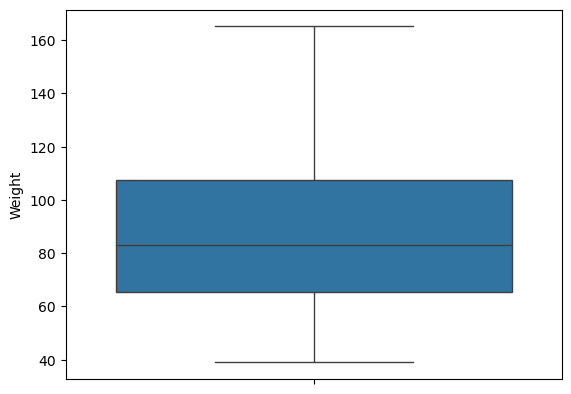

In [45]:
sns.boxplot(data=Obesity,y="Weight")

# Skewness Treatment

In [47]:
Obesity.skew(numeric_only=True) #no skewness so no treatment required

Gender           -0.023704
Age               1.264879
Height           -0.012855
Weight            0.251944
family_history   -1.646216
FAVC             -2.399125
FCVC             -0.432906
NCP              -1.107097
CAEC             -1.907526
SMOKE             6.712867
CH2O             -0.104912
SCC               4.366270
FAF               0.498490
TUE               0.618502
CALC              0.236481
MTRANS           -1.280169
Obesity           0.006754
dtype: float64

# Correlation

In [49]:
Obesity1=Obesity.corr()
Obesity1

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
Gender,1.000000,0.047032,0.618466,0.161600,0.102512,0.064934,-0.274505,0.067600,0.091543,0.044698,0.107930,-0.102633,0.189607,0.017269,0.007616,-0.137537,0.024908
Age,0.047032,1.000000,-0.026705,0.212926,0.216881,0.070068,0.017354,-0.048264,0.091696,0.082312,-0.047784,-0.125114,-0.151160,-0.300075,-0.047187,-0.613875,0.237726
Height,0.618466,-0.026705,1.000000,0.463087,0.247684,0.178364,-0.038121,0.243672,0.048818,0.055499,0.213376,-0.133753,0.294709,0.051912,-0.129732,-0.073609,0.038986
Weight,0.161600,0.212926,0.463087,1.000000,0.496976,0.272371,0.216067,0.107460,0.287882,0.025779,0.200667,-0.201966,-0.051624,-0.071673,-0.206695,0.004540,0.387744
family_history,0.102512,0.216881,0.247684,0.496976,1.000000,0.208036,0.040372,0.071370,0.169787,0.017385,0.147437,-0.185422,-0.056673,0.022943,0.036676,-0.101540,0.313667
FAVC,0.064934,0.070068,0.178364,0.272371,0.208036,1.000000,-0.027283,-0.007000,0.150068,-0.050660,0.009719,-0.190658,-0.107995,0.068417,-0.089520,-0.069800,0.044582
FCVC,-0.274505,0.017354,-0.038121,0.216067,0.040372,-0.027283,1.000000,0.042216,-0.054670,0.014320,0.068461,0.071852,0.019939,-0.101135,-0.060781,0.064743,0.018522
NCP,0.067600,-0.048264,0.243672,0.107460,0.071370,-0.007000,0.042216,1.000000,-0.097801,0.007811,0.057088,-0.015624,0.129504,0.036326,-0.071747,-0.053858,-0.092616
CAEC,0.091543,0.091696,0.048818,0.287882,0.169787,0.150068,-0.054670,-0.097801,1.000000,-0.055282,0.144995,-0.109179,-0.030110,-0.048567,-0.047540,-0.048535,0.327295
SMOKE,0.044698,0.082312,0.055499,0.025779,0.017385,-0.050660,0.014320,0.007811,-0.055282,1.000000,-0.031995,0.047731,0.011216,0.017613,-0.082471,-0.010702,-0.023256


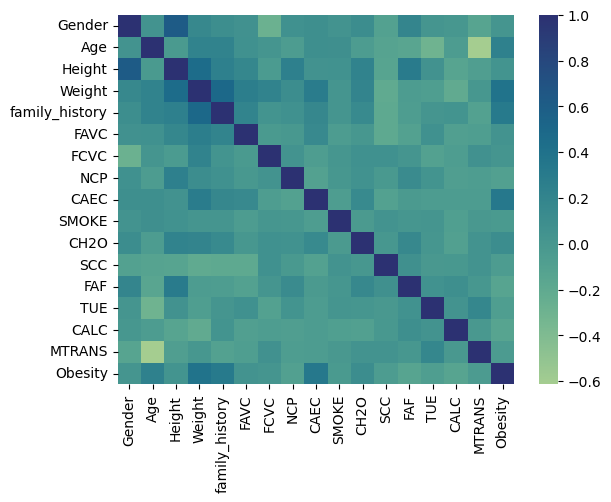

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(Obesity1,cmap="crest")
plt.show()

In [51]:
# Conclusion from Correlation
#Obesity shows a moderate positive correlation with Weight (0.39) and Family History (0.31), indicating higher risk of obesity.
#Age has a moderate positive correlation with Obesity (0.24), meaning that obesity risk increases slightly as age goes up.
#Physical Activity Factors (like FAF and TUE) show weaker correlations with obesity.
#Lifestyle factors such as Dietary Habits (FAVC, FCVC, NCP) and Smoking have weak correlations with obesity.

# Classification Technique

In [53]:
x=Obesity.iloc[:,0:16]
#x

In [54]:
y=Obesity.iloc[:,16]
#y

# Decision Tree

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
dx_train,dx_test,dy_train,dy_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [58]:
dx_train.shape,dx_test.shape,dy_train.shape,dy_test.shape

((1688, 16), (423, 16), (1688,), (423,))

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [60]:
dt.fit(dx_train,dy_train)

DecisionTreeClassifier()

In [61]:
p1=dt.predict(dx_test)
p1

array([5, 4, 4, 6, 2, 0, 3, 1, 0, 3, 6, 0, 6, 4, 0, 2, 0, 5, 2, 6, 2, 2,
       0, 1, 2, 3, 5, 1, 1, 4, 5, 2, 2, 4, 0, 4, 5, 3, 6, 3, 2, 3, 4, 1,
       2, 0, 2, 2, 3, 4, 2, 2, 2, 6, 5, 3, 3, 4, 1, 2, 5, 4, 1, 2, 1, 2,
       3, 2, 1, 4, 5, 6, 6, 3, 1, 2, 2, 4, 4, 4, 2, 0, 5, 2, 3, 2, 2, 6,
       1, 1, 6, 6, 3, 6, 1, 2, 0, 0, 1, 6, 5, 1, 2, 3, 1, 1, 3, 1, 2, 6,
       1, 6, 1, 6, 3, 5, 2, 6, 2, 3, 3, 0, 3, 2, 4, 1, 0, 2, 3, 2, 6, 4,
       4, 4, 3, 4, 3, 5, 6, 5, 6, 3, 4, 3, 4, 6, 2, 2, 4, 5, 0, 6, 4, 5,
       2, 4, 0, 1, 6, 2, 1, 1, 2, 4, 1, 4, 5, 4, 4, 3, 2, 1, 4, 5, 1, 5,
       3, 6, 3, 6, 0, 1, 3, 6, 2, 2, 3, 1, 5, 2, 3, 2, 1, 5, 4, 3, 2, 4,
       0, 2, 0, 5, 2, 1, 6, 3, 4, 6, 1, 1, 2, 3, 4, 4, 6, 4, 5, 4, 0, 2,
       4, 1, 6, 0, 1, 0, 0, 5, 5, 3, 3, 4, 6, 1, 4, 1, 6, 4, 0, 3, 4, 0,
       2, 3, 5, 5, 4, 0, 4, 4, 2, 4, 1, 2, 4, 6, 3, 1, 4, 0, 6, 2, 4, 5,
       2, 6, 2, 2, 4, 3, 0, 5, 5, 2, 5, 6, 6, 3, 0, 4, 6, 3, 6, 4, 6, 6,
       1, 0, 4, 1, 3, 3, 0, 1, 2, 0, 0, 2, 4, 6, 3,

In [62]:
M1=confusion_matrix(p1,dy_test)
M1

array([[47,  2,  0,  0,  0,  0,  0],
       [ 2, 43,  0,  0,  0,  9,  0],
       [ 0,  0, 69,  0,  0,  1,  3],
       [ 0,  0,  3, 53,  0,  0,  0],
       [ 0,  0,  0,  0, 73,  0,  0],
       [ 0,  5,  0,  0,  0, 47,  2],
       [ 0,  0,  3,  0,  0,  4, 57]], dtype=int64)

In [63]:
ac1=M1.diagonal().sum()/M1.sum()*100
ac1

91.96217494089835

In [64]:
print(classification_report(p1,dy_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        49
           1       0.86      0.80      0.83        54
           2       0.92      0.95      0.93        73
           3       1.00      0.95      0.97        56
           4       1.00      1.00      1.00        73
           5       0.77      0.87      0.82        54
           6       0.92      0.89      0.90        64

    accuracy                           0.92       423
   macro avg       0.92      0.92      0.92       423
weighted avg       0.92      0.92      0.92       423



In [65]:
#The model achieves an accuracy of 91%, so it correctly predicts the class in 91% of the cases. This is a strong performance.
#Precision: 0.94 – This means that of all the instances predicted as Class 0, 94% are correctly classified as Class 0.
#Recall: 0.96– This means that out of all the actual instances of Class 0, the model was able to correctly identify 96%.
#F1-score: 0.95 – This score represents a balance between precision and recall for Class 0. The model is relatively good at both precision and recall for this class.

# Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [68]:
rf.fit(dx_train,dy_train)

RandomForestClassifier()

In [69]:
p2=rf.predict(dx_test)
p2

array([5, 4, 4, 6, 2, 1, 3, 1, 0, 3, 6, 0, 6, 4, 0, 2, 0, 1, 2, 6, 2, 5,
       0, 1, 2, 3, 5, 1, 1, 4, 5, 2, 2, 4, 0, 4, 5, 3, 6, 3, 2, 3, 4, 1,
       2, 0, 2, 2, 3, 4, 2, 2, 2, 1, 5, 3, 3, 4, 1, 1, 1, 4, 1, 2, 1, 2,
       3, 2, 5, 4, 5, 6, 6, 3, 1, 2, 2, 4, 4, 4, 2, 0, 5, 2, 3, 2, 2, 6,
       1, 1, 6, 6, 3, 6, 1, 1, 0, 1, 1, 6, 5, 1, 2, 3, 1, 1, 3, 5, 2, 6,
       1, 6, 1, 6, 3, 5, 2, 5, 2, 3, 3, 0, 3, 2, 4, 1, 0, 2, 3, 2, 6, 4,
       4, 4, 3, 4, 3, 5, 6, 5, 5, 3, 4, 3, 4, 5, 2, 2, 4, 6, 0, 6, 4, 1,
       2, 4, 0, 1, 6, 2, 1, 1, 2, 4, 1, 4, 5, 4, 4, 3, 2, 1, 4, 5, 1, 5,
       3, 6, 3, 6, 0, 1, 3, 6, 2, 2, 3, 1, 5, 2, 3, 2, 1, 5, 4, 3, 2, 4,
       0, 2, 0, 5, 2, 5, 6, 3, 4, 6, 0, 1, 2, 3, 4, 4, 6, 4, 1, 4, 0, 2,
       4, 1, 6, 0, 1, 0, 0, 1, 5, 3, 3, 4, 6, 1, 4, 1, 6, 4, 0, 3, 4, 1,
       2, 3, 5, 5, 4, 0, 4, 4, 6, 4, 1, 2, 4, 6, 3, 1, 4, 0, 6, 2, 4, 5,
       2, 5, 2, 2, 4, 2, 0, 5, 5, 2, 5, 6, 1, 3, 0, 4, 6, 3, 6, 4, 6, 6,
       1, 0, 4, 1, 3, 3, 0, 1, 2, 0, 0, 2, 4, 6, 3,

In [70]:
M2=confusion_matrix(p2,dy_test)
M2

array([[44,  0,  0,  0,  0,  0,  0],
       [ 5, 48,  0,  0,  0, 10,  5],
       [ 0,  0, 72,  0,  0,  0,  0],
       [ 0,  0,  1, 53,  0,  0,  0],
       [ 0,  0,  0,  0, 73,  0,  0],
       [ 0,  2,  1,  0,  0, 50,  0],
       [ 0,  0,  1,  0,  0,  1, 57]], dtype=int64)

In [71]:
ac2=M2.diagonal().sum()/M2.sum()*100
ac2

93.85342789598108

In [72]:
print(classification_report(p2,dy_test))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        44
           1       0.96      0.71      0.81        68
           2       0.96      1.00      0.98        72
           3       1.00      0.98      0.99        54
           4       1.00      1.00      1.00        73
           5       0.82      0.94      0.88        53
           6       0.92      0.97      0.94        59

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423



In [73]:
#The model demonstrates strong overall performance, with an accuracy of 94%

# KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=80)

In [76]:
knn.fit(dx_train,dy_train)

KNeighborsClassifier(n_neighbors=80)

In [77]:
p3=knn.predict(dx_test)
p3

array([1, 4, 4, 2, 2, 0, 3, 0, 0, 4, 6, 0, 6, 4, 0, 6, 0, 5, 2, 6, 6, 6,
       0, 1, 5, 3, 5, 5, 5, 4, 5, 2, 3, 4, 0, 3, 6, 4, 1, 2, 6, 4, 4, 1,
       2, 0, 6, 2, 4, 4, 3, 2, 3, 2, 6, 3, 3, 4, 1, 3, 1, 4, 1, 3, 5, 2,
       3, 4, 6, 4, 6, 6, 2, 3, 2, 2, 2, 4, 4, 4, 2, 0, 5, 3, 3, 2, 4, 6,
       0, 1, 6, 5, 2, 2, 6, 2, 0, 0, 0, 6, 5, 5, 6, 2, 0, 1, 3, 6, 2, 2,
       0, 2, 1, 5, 3, 5, 5, 6, 2, 3, 4, 0, 3, 2, 4, 0, 0, 2, 4, 2, 2, 4,
       4, 4, 4, 4, 3, 5, 2, 2, 6, 4, 4, 4, 4, 2, 2, 2, 4, 3, 0, 1, 4, 6,
       4, 4, 0, 0, 2, 2, 1, 1, 2, 4, 1, 4, 6, 4, 4, 4, 4, 1, 4, 5, 1, 5,
       3, 5, 2, 5, 0, 1, 3, 6, 4, 2, 4, 0, 6, 2, 3, 2, 5, 5, 4, 4, 6, 4,
       0, 2, 0, 5, 5, 5, 3, 4, 3, 5, 0, 5, 2, 2, 4, 4, 6, 4, 2, 4, 0, 2,
       3, 1, 6, 0, 5, 0, 0, 1, 5, 3, 3, 4, 1, 1, 4, 5, 5, 4, 0, 4, 4, 0,
       3, 3, 5, 5, 4, 0, 4, 4, 6, 4, 0, 6, 4, 1, 2, 5, 4, 0, 2, 2, 4, 1,
       2, 5, 5, 2, 4, 3, 0, 5, 5, 4, 5, 2, 5, 4, 0, 4, 6, 4, 5, 4, 2, 6,
       1, 0, 4, 1, 3, 3, 0, 0, 2, 0, 0, 4, 4, 6, 3,

In [78]:
M3=confusion_matrix(p3,dy_test)
M3

array([[47, 13,  0,  0,  0,  1,  0],
       [ 2, 19,  0,  0,  0,  8,  7],
       [ 0,  1, 40,  6,  0,  8, 19],
       [ 0,  0,  9, 29,  3,  0,  3],
       [ 0,  0,  9, 18, 70,  0,  0],
       [ 0, 14,  6,  0,  0, 31, 10],
       [ 0,  3, 11,  0,  0, 13, 23]], dtype=int64)

In [79]:
ac3=M3.diagonal().sum()/M3.sum()*100
ac3

61.22931442080378

In [80]:
print(classification_report(p3,dy_test))

              precision    recall  f1-score   support

           0       0.96      0.77      0.85        61
           1       0.38      0.53      0.44        36
           2       0.53      0.54      0.54        74
           3       0.55      0.66      0.60        44
           4       0.96      0.72      0.82        97
           5       0.51      0.51      0.51        61
           6       0.37      0.46      0.41        50

    accuracy                           0.61       423
   macro avg       0.61      0.60      0.60       423
weighted avg       0.66      0.61      0.63       423



In [81]:
lst=list()

In [82]:
for i in range(1,99):
 knn=KNeighborsClassifier(n_neighbors=i)
 knn.fit(dx_train,dy_train)
 knn_pr=knn.predict(dx_test)
 mat=confusion_matrix(knn_pr,dy_test)
 acc=mat.diagonal().sum()/mat.sum()*100
 lst.append(acc)

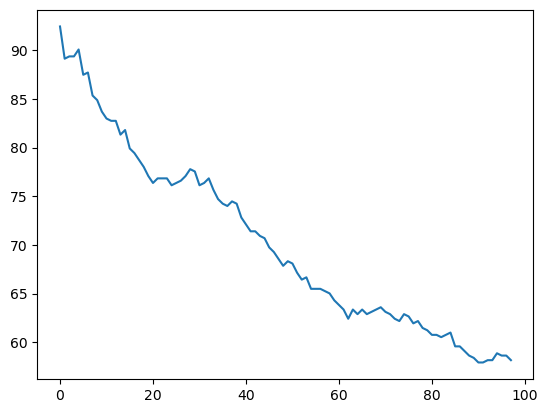

In [83]:
p=plt.plot(lst)

In [84]:
#The model achieves an overall accuracy of 61%, which is relatively low. This suggests that there is considerable room for improvement, especially in terms of correctly classifying the majority of the instances.

# SVM

In [86]:
from sklearn.svm import SVC
svc=SVC()

In [87]:
svc.fit(dx_train,dy_train)

SVC()

In [88]:
p4=svc.predict(dx_test)
p4

array([1, 4, 4, 2, 6, 0, 3, 0, 0, 3, 6, 0, 6, 2, 0, 2, 0, 1, 6, 6, 6, 5,
       0, 1, 2, 3, 5, 1, 5, 3, 5, 6, 4, 3, 0, 4, 6, 2, 1, 2, 6, 2, 4, 1,
       2, 0, 6, 2, 3, 4, 4, 2, 3, 2, 5, 3, 3, 3, 1, 2, 1, 2, 1, 4, 5, 6,
       4, 3, 5, 3, 5, 6, 6, 4, 6, 2, 6, 4, 3, 3, 4, 0, 5, 3, 3, 6, 2, 2,
       0, 0, 6, 5, 2, 2, 5, 2, 0, 0, 0, 6, 5, 5, 6, 2, 0, 1, 4, 5, 2, 6,
       0, 2, 1, 5, 3, 1, 6, 6, 2, 4, 3, 0, 3, 4, 4, 0, 0, 2, 3, 2, 6, 3,
       4, 3, 3, 4, 4, 5, 2, 6, 6, 3, 3, 2, 3, 6, 2, 2, 4, 2, 0, 1, 3, 5,
       4, 4, 1, 0, 6, 2, 1, 1, 2, 2, 1, 3, 6, 4, 2, 3, 4, 1, 2, 1, 1, 5,
       3, 2, 2, 1, 0, 1, 4, 6, 3, 2, 3, 0, 6, 6, 3, 2, 5, 2, 2, 2, 6, 3,
       0, 6, 0, 5, 2, 5, 2, 3, 4, 5, 0, 1, 6, 2, 4, 3, 6, 2, 6, 4, 0, 6,
       4, 1, 6, 0, 5, 0, 0, 1, 5, 3, 3, 4, 1, 1, 2, 5, 5, 4, 0, 2, 2, 0,
       3, 4, 5, 5, 3, 0, 3, 2, 6, 4, 0, 2, 2, 1, 2, 5, 4, 0, 6, 2, 3, 1,
       6, 5, 6, 4, 4, 4, 0, 5, 1, 2, 5, 2, 5, 3, 0, 3, 6, 3, 5, 2, 2, 6,
       1, 0, 4, 1, 3, 3, 0, 0, 2, 0, 0, 4, 2, 6, 3,

In [89]:
M4=confusion_matrix(p4,dy_test)
M4

array([[44, 15,  0,  0,  0,  1,  0],
       [ 5, 21,  0,  0,  0, 15,  8],
       [ 0,  0, 27, 11, 19,  4, 17],
       [ 0,  0,  7, 32, 23,  0,  0],
       [ 0,  0, 12, 10, 31,  0,  0],
       [ 0, 12,  0,  0,  0, 29,  8],
       [ 0,  2, 29,  0,  0, 12, 29]], dtype=int64)

In [90]:
ac4=M4.diagonal().sum()/M4.sum()*100
ac4

50.35460992907801

In [91]:
print(classification_report(p4,dy_test))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81        60
           1       0.42      0.43      0.42        49
           2       0.36      0.35      0.35        78
           3       0.60      0.52      0.56        62
           4       0.42      0.58      0.49        53
           5       0.48      0.59      0.53        49
           6       0.47      0.40      0.43        72

    accuracy                           0.50       423
   macro avg       0.52      0.51      0.51       423
weighted avg       0.52      0.50      0.51       423



In [92]:
#The classification report indicates that the model’s performance is quite weak overall, with an accuracy of 50%.
#The model achieves 50% accuracy, so it correctly classifies half of the instances. This suggests that the model is struggling significantly to correctly classify most of the classes.

# Naive Bayes

In [94]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [95]:
nb.fit(dx_train,dy_train)

MultinomialNB()

In [96]:
p5=nb.predict(dx_test)
p5

array([5, 4, 4, 2, 6, 6, 3, 0, 0, 3, 2, 0, 6, 4, 0, 6, 1, 1, 6, 2, 6, 6,
       0, 1, 2, 3, 5, 1, 1, 4, 5, 6, 2, 4, 0, 4, 2, 2, 1, 2, 2, 2, 4, 1,
       3, 0, 2, 4, 3, 4, 3, 3, 6, 3, 2, 3, 3, 4, 1, 2, 0, 4, 1, 5, 1, 2,
       3, 3, 2, 4, 6, 2, 2, 3, 6, 4, 6, 4, 4, 4, 3, 1, 5, 6, 3, 2, 3, 6,
       0, 1, 2, 5, 2, 2, 2, 3, 0, 0, 1, 6, 5, 5, 4, 2, 1, 6, 3, 2, 4, 2,
       0, 2, 1, 1, 3, 6, 4, 6, 2, 3, 3, 0, 3, 3, 4, 6, 0, 2, 2, 2, 2, 4,
       4, 4, 3, 4, 3, 5, 2, 2, 6, 3, 4, 2, 4, 6, 2, 2, 4, 3, 0, 6, 4, 2,
       3, 4, 1, 0, 6, 3, 0, 6, 2, 4, 1, 4, 6, 4, 4, 3, 3, 1, 4, 5, 1, 5,
       3, 2, 2, 1, 0, 6, 3, 5, 3, 3, 3, 0, 5, 4, 3, 4, 1, 2, 4, 2, 6, 4,
       0, 5, 0, 5, 2, 6, 2, 2, 4, 5, 0, 5, 6, 2, 4, 4, 6, 4, 1, 4, 0, 6,
       4, 1, 1, 0, 6, 0, 0, 5, 6, 3, 3, 4, 6, 5, 4, 1, 6, 4, 0, 3, 4, 0,
       6, 3, 5, 5, 4, 0, 4, 4, 6, 4, 1, 6, 4, 1, 2, 5, 4, 0, 6, 3, 4, 5,
       4, 5, 4, 3, 4, 3, 0, 5, 5, 2, 5, 2, 1, 3, 0, 4, 2, 2, 2, 4, 6, 6,
       1, 0, 4, 1, 3, 3, 0, 0, 5, 0, 0, 3, 4, 6, 3,

In [97]:
M5=confusion_matrix(p5,dy_test)
M5

array([[43, 10,  0,  0,  0,  1,  0],
       [ 6, 23,  0,  0,  0,  4,  8],
       [ 0,  2, 18, 14,  0, 14, 26],
       [ 0,  0, 20, 38,  0,  1,  2],
       [ 0,  0, 14,  0, 73,  0,  0],
       [ 0,  8,  4,  0,  0, 27,  6],
       [ 0,  7, 19,  1,  0, 14, 20]], dtype=int64)

In [98]:
ac5=M5.diagonal().sum()/M5.sum()*100
ac5

57.21040189125296

In [99]:
print(classification_report(p5,dy_test))

              precision    recall  f1-score   support

           0       0.88      0.80      0.83        54
           1       0.46      0.56      0.51        41
           2       0.24      0.24      0.24        74
           3       0.72      0.62      0.67        61
           4       1.00      0.84      0.91        87
           5       0.44      0.60      0.51        45
           6       0.32      0.33      0.33        61

    accuracy                           0.57       423
   macro avg       0.58      0.57      0.57       423
weighted avg       0.60      0.57      0.58       423



In [100]:
#The model shows poor accuracy of 57%

# XG Boost

In [102]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [103]:
xgb.fit(dx_train,dy_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [104]:
xgb_p=xgb.predict(dx_test)
xgb_p

array([5, 4, 4, 2, 2, 1, 3, 1, 0, 3, 6, 0, 6, 4, 0, 2, 0, 1, 2, 6, 2, 5,
       0, 1, 2, 3, 5, 1, 1, 4, 5, 2, 2, 4, 0, 4, 5, 3, 6, 3, 2, 3, 4, 1,
       2, 0, 2, 2, 2, 4, 2, 2, 2, 6, 5, 3, 3, 4, 1, 2, 1, 4, 1, 2, 1, 2,
       3, 2, 5, 4, 5, 6, 6, 3, 1, 2, 2, 4, 4, 4, 2, 0, 5, 2, 3, 2, 2, 6,
       1, 1, 6, 6, 3, 6, 1, 6, 0, 0, 1, 6, 5, 1, 2, 3, 1, 1, 3, 5, 2, 6,
       1, 6, 1, 6, 3, 5, 2, 6, 2, 3, 3, 0, 3, 2, 4, 1, 0, 2, 3, 2, 6, 4,
       4, 4, 3, 4, 3, 5, 6, 5, 6, 3, 4, 3, 4, 5, 2, 2, 4, 6, 0, 6, 4, 5,
       2, 4, 0, 1, 6, 2, 1, 1, 2, 4, 1, 4, 5, 4, 4, 3, 2, 1, 4, 5, 1, 5,
       3, 6, 3, 6, 0, 1, 3, 6, 2, 2, 3, 1, 5, 2, 3, 2, 1, 5, 4, 3, 2, 4,
       0, 2, 0, 5, 2, 5, 6, 3, 4, 6, 0, 5, 2, 3, 4, 4, 6, 4, 5, 4, 0, 2,
       4, 1, 6, 0, 1, 0, 0, 1, 5, 3, 3, 4, 6, 5, 4, 1, 6, 4, 0, 6, 4, 0,
       2, 3, 5, 5, 4, 0, 4, 4, 6, 4, 1, 2, 4, 6, 3, 1, 4, 0, 6, 2, 4, 5,
       2, 5, 2, 2, 4, 2, 0, 5, 5, 2, 1, 6, 6, 3, 0, 4, 6, 3, 6, 4, 6, 6,
       5, 0, 4, 1, 3, 3, 0, 1, 2, 0, 0, 2, 4, 6, 3,

In [105]:
xgb_M=confusion_matrix(xgb_p,dy_test)
xgb_M

array([[48,  1,  0,  0,  0,  0,  0],
       [ 1, 48,  0,  0,  0,  3,  0],
       [ 0,  0, 74,  0,  0,  0,  2],
       [ 0,  0,  0, 52,  0,  0,  0],
       [ 0,  0,  0,  0, 73,  0,  0],
       [ 0,  1,  0,  0,  0, 56,  0],
       [ 0,  0,  1,  1,  0,  2, 60]], dtype=int64)

In [106]:
xgb_ac=xgb_M.diagonal().sum()/xgb_M.sum()*100
xgb_ac

97.16312056737588

In [107]:
print(classification_report(xgb_p,dy_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        49
           1       0.96      0.92      0.94        52
           2       0.99      0.97      0.98        76
           3       0.98      1.00      0.99        52
           4       1.00      1.00      1.00        73
           5       0.92      0.98      0.95        57
           6       0.97      0.94      0.95        64

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423



In [108]:
#With XGBoost the model performance gets boosted to 97%

# Feature Selection

In [110]:
#Performing feature selection to check if removing non-significant column has any significant impact on model.

# DT

In [112]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier()

In [113]:
dt1.fit(dx_train,dy_train)

DecisionTreeClassifier()

In [114]:
dt1.feature_importances_

array([0.15702069, 0.01976208, 0.25732255, 0.48582318, 0.        ,
       0.02485239, 0.001614  , 0.00726287, 0.00831819, 0.00069172,
       0.01143668, 0.        , 0.00952647, 0.01479371, 0.00065317,
       0.00092229])

In [115]:
df2=pd.DataFrame({"Importances":list(dt1.feature_importances_),"columns":list(x)})
df2

,Importances,columns
0,0.157021,Gender
1,0.019762,Age
2,0.257323,Height
3,0.485823,Weight
4,0.000000,family_history
5,0.024852,FAVC
6,0.001614,FCVC
7,0.007263,NCP
8,0.008318,CAEC
9,0.000692,SMOKE


In [116]:
l_new=Obesity.drop(["family_history","SCC","SMOKE"],axis=1) #dropping the non-significant columns
l_new.shape

(2111, 14)

In [117]:
l_new.isnull().sum()

Gender     0
Age        0
Height     0
Weight     0
FAVC       0
FCVC       0
NCP        0
CAEC       0
CH2O       0
FAF        0
TUE        0
CALC       0
MTRANS     0
Obesity    0
dtype: int64

In [118]:
l_new.head()

,Gender,Age,Height,Weight,FAVC,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS,Obesity
0,0,21.0,1.62,64.0,0,2.0,3.0,2,2.0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,0,3.0,3.0,2,3.0,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,0,2.0,3.0,2,2.0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,3.0,3.0,2,2.0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,2.0,1.0,2,2.0,0.0,0.0,2,3,6


In [119]:
x1=l_new.iloc[:,0:13]
#x1

In [120]:
y1=l_new.iloc[:,13]
#y1

In [121]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=101)
x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape

((1688, 13), (423, 13), (1688,), (423,))

In [122]:
rf.fit(x1_train,y1_train)

RandomForestClassifier()

In [123]:
p_rf=rf.predict(x1_test)
p_rf

array([5, 1, 3, 2, 4, 3, 2, 6, 5, 6, 6, 2, 3, 0, 4, 3, 6, 6, 5, 6, 6, 4,
       6, 3, 3, 5, 1, 4, 5, 5, 0, 6, 2, 2, 2, 1, 5, 6, 2, 4, 0, 2, 4, 0,
       4, 3, 0, 0, 3, 6, 2, 1, 3, 3, 4, 3, 6, 4, 3, 1, 2, 1, 1, 3, 2, 2,
       3, 0, 2, 2, 3, 1, 5, 3, 2, 3, 0, 2, 0, 0, 0, 3, 6, 4, 1, 6, 3, 1,
       4, 4, 5, 5, 3, 0, 3, 2, 4, 5, 1, 4, 0, 5, 1, 0, 6, 0, 1, 2, 2, 6,
       4, 2, 2, 4, 5, 3, 3, 3, 2, 6, 2, 3, 6, 3, 4, 0, 2, 2, 4, 5, 1, 6,
       6, 1, 1, 3, 5, 6, 2, 1, 6, 2, 3, 4, 6, 1, 4, 3, 2, 6, 3, 4, 2, 1,
       5, 1, 6, 5, 3, 1, 6, 2, 2, 6, 0, 5, 2, 3, 2, 1, 2, 6, 1, 6, 6, 6,
       5, 2, 0, 6, 1, 1, 4, 0, 6, 1, 5, 3, 4, 1, 1, 0, 6, 4, 3, 1, 1, 3,
       4, 1, 5, 1, 0, 1, 0, 2, 6, 5, 6, 5, 5, 1, 5, 0, 6, 4, 3, 0, 5, 6,
       1, 6, 0, 6, 5, 5, 2, 6, 4, 1, 3, 3, 1, 1, 6, 2, 2, 0, 4, 3, 5, 6,
       5, 4, 0, 5, 3, 4, 4, 2, 4, 6, 5, 6, 3, 6, 6, 6, 5, 3, 2, 0, 5, 3,
       6, 2, 0, 5, 3, 3, 3, 2, 1, 5, 2, 4, 5, 5, 2, 3, 4, 2, 1, 4, 3, 3,
       0, 1, 4, 1, 6, 3, 0, 5, 6, 5, 2, 6, 4, 4, 3,

In [124]:
M_rf=confusion_matrix(p_rf,y1_test)
M_rf

array([[50,  0,  0,  0,  0,  0,  0],
       [ 3, 45,  0,  1,  0,  6,  1],
       [ 0,  0, 65,  1,  0,  0,  1],
       [ 0,  0,  2, 68,  0,  0,  0],
       [ 0,  0,  0,  0, 53,  0,  0],
       [ 0,  2,  1,  0,  0, 53,  0],
       [ 0,  0,  2,  0,  0,  1, 68]], dtype=int64)

In [125]:
ac_rf=M_rf.diagonal().sum()/M_rf.sum()*100
ac_rf

95.0354609929078

In [126]:
print(classification_report(p_rf,y1_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        50
           1       0.96      0.80      0.87        56
           2       0.93      0.97      0.95        67
           3       0.97      0.97      0.97        70
           4       1.00      1.00      1.00        53
           5       0.88      0.95      0.91        56
           6       0.97      0.96      0.96        71

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



In [127]:
#After performing feature selection,non significant columns were removed and a new model was fitted performing Random forest.
#The accuracy achieved with new model after removing non-significant columns family_history,SCC,SMOKE is 96 percent.

In [ ]:
#Conclusion: 